In [11]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

In [32]:
'''
Funciton: plot_decision_boundary
Usage: 
    Draw the boundary of the prediction function 
    on the dataset with features X and labels y 
parameter: 
    X: features of dataset
    y: labels of dataset
    pred_func: prediction function
Example:
    plot_decision_boundary(X, y, lambda x: model.predict(x))
    plt.title("3 Hidden Layer")
'''
def plot_decision_boundary(X, y, pred_func):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

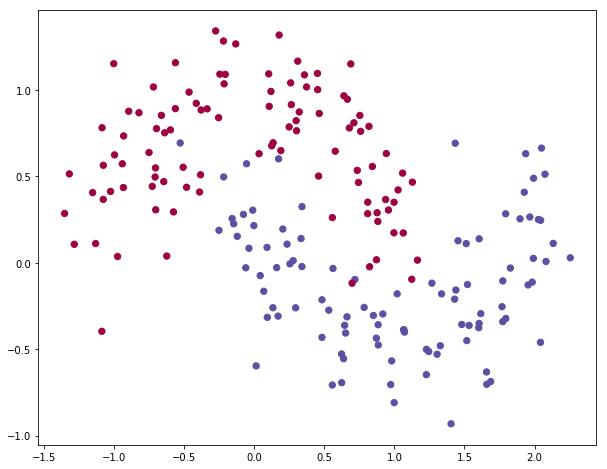

In [15]:
'''
Show the dataset I used from sklearn
'''
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)
np.random.seed(0)
X, y = sklearn.datasets.make_moons(200, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [34]:
'''
Some Activation function
But only _tanh is used now
'''
def _tanh(x):
    return np.tanh(x)

def _sigmoid(x):
    return 1/(1 + np.exp(x))

def _ReLU(x):
    return x*(x > 0)

In [35]:
class NNmodel:
    '''
    Function: __init__
    Usage:
        Generate a Neural Network model
    Parameter:
        X: features of dataset
        y: labels of dataset
        inputDim: dimension of input layer
        outputDim: dimension of output layer
        epsilon: learning rate
        regLambda: regularization rate
    Example:
        model = NNmodel(X,y,2,2,0.01,0.01)
    '''
    def __init__(self, X, y, inputDim=2, outputDim=2, epsilon=0.01, regLambda=0.01):
        self.X = X
        self.y = y
        self._inputDim = inputDim
        self._outputDim = outputDim
        self.size = len(self.X)
        self.epsilon = epsilon
        self.regLambda = regLambda
        
        self.param = {"W1":0, "b1":0, "W2":0, "b2": 0}
        self.activation = "tanh"
        self._activation_list = ["tanh"]
        
    def activate(self, x):
        if (self.activation == "tanh"):
            return _tanh(x)
        elif (self.activation == "sigmoid"):
            return sigmoid(x)
        elif (self.activation == "ReLU"):
            return ReLU(x)
        
    def get_parameter(self):
        return self.param["W1"], self.param["b1"], self.param["W2"], self.param["b2"]
    
    def calculate_loss(self):
        return self.cross_entropy()
    
    
    def cross_entropy(self):
        W1, b1, W2, b2 = self.get_parameter()
        # FP
        z1 = X.dot(W1) + b1
        a1 = self.activate(z1)
        z2 = a1.dot(W2) + b2
        expResult = np.exp(z2)
        probs = expResult / np.sum(expResult, axis=1, keepdims=True)
        logProbs = -np.log(probs[range(self.size), y])
        loss = np.sum(logProbs)
        loss += self.regLambda/2 * (np.sum(np.square(W1)) + np.sum(np.square(W2))) #Regularization
        return 1./self.size * loss

    def predict(self, x):
        W1, b1, W2, b2 = self.get_parameter()
        # FP
        z1 = x.dot(W1) + b1
        a1 = self.activate(z1)
        z2 = a1.dot(W2) + b2
        expResult = np.exp(z2)
        probs = expResult / np.sum(expResult, axis=1, keepdims=True)
        return np.argmax(probs, axis=1)
    
    def build_model(self, hiddenDim, passes=20000, print_loss=False, activation="tanh"):
        if (activation not in self._activation_list):
            return None
        self.activation = activation

        np.random.seed(0)
        W1 = np.random.randn(self._inputDim, hiddenDim) / np.sqrt(self._inputDim)
        b1 = np.zeros((1, hiddenDim))
        W2 = np.random.randn(hiddenDim, self._outputDim) / np.sqrt(hiddenDim)
        b2 = np.zeros((1, self._outputDim))
        self.param = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}

        for i in range(0, passes):
            # FP
            z1 = X.dot(W1) + b1
            a1 = self.activate(z1)
            z2 = a1.dot(W2) + b2
            expResult = np.exp(z2)
            probs = expResult / np.sum(expResult, axis=1, keepdims=True)
            # BP
            delta3 = probs
            delta3[range(self.size), y] -= 1
            dW2 = (a1.T).dot(delta3)
            db2 = np.sum(delta3, axis=0, keepdims=True)
            delta2 = delta3.dot(W2.T) * (1 - np.power(a1, 2))
            dW1 = np.dot(X.T, delta2)
            db1 = np.sum(delta2, axis=0)
            # Regularization
            dW2 += self.regLambda * W2
            dW1 += self.regLambda * W1
            
            W1 += -self.epsilon * dW1
            b1 += -self.epsilon * db1
            W2 += -self.epsilon * dW2
            b2 += -self.epsilon * db2
            self.param = {"W1":W1, "b1":b1, "W2":W2, "b2":b2}

            if print_loss and i % 2000 == 0:
              print("Loss after iteration %i: %f" %(i, self.calculate_loss()))

        return self.param
        

Loss after iteration 0: 0.432387
Loss after iteration 2000: 0.068901
Loss after iteration 4000: 0.071253
Loss after iteration 6000: 0.071293
Loss after iteration 8000: 0.071308
Loss after iteration 10000: 0.071314
Loss after iteration 12000: 0.071315
Loss after iteration 14000: 0.071316
Loss after iteration 16000: 0.071316
Loss after iteration 18000: 0.071316


Text(0.5,1,'3 Hidden Layer')

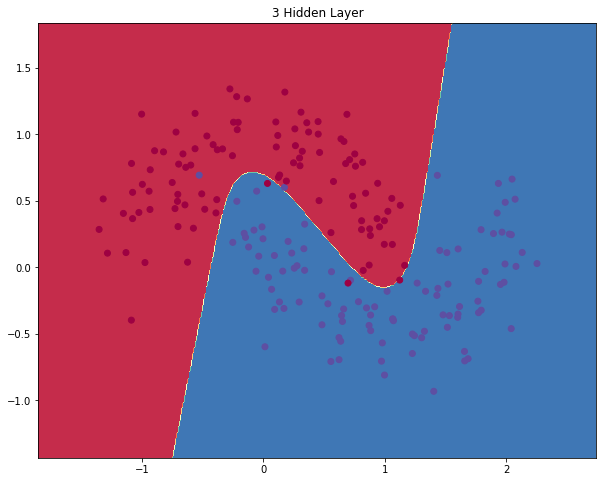

In [36]:
model = NNmodel(X,y)
param = model.build_model(3, print_loss=True, activation="tanh")

plot_decision_boundary(X, y, lambda x: model.predict(x))
plt.title("3 Hidden Layer")

Loss after iteration 0: 0.567280
Loss after iteration 2000: 0.333505
Loss after iteration 4000: 0.333476
Loss after iteration 6000: 0.333457
Loss after iteration 8000: 0.333444
Loss after iteration 10000: 0.333435
Loss after iteration 12000: 0.333430
Loss after iteration 14000: 0.333426
Loss after iteration 16000: 0.333423
Loss after iteration 18000: 0.333421
Loss after iteration 0: 0.546544
Loss after iteration 2000: 0.322465
Loss after iteration 4000: 0.322690
Loss after iteration 6000: 0.321855
Loss after iteration 8000: 0.324216
Loss after iteration 10000: 0.139051
Loss after iteration 12000: 0.322787
Loss after iteration 14000: 0.330833
Loss after iteration 16000: 0.317691
Loss after iteration 18000: 0.326556
Loss after iteration 0: 0.432387
Loss after iteration 2000: 0.068901
Loss after iteration 4000: 0.071253
Loss after iteration 6000: 0.071293
Loss after iteration 8000: 0.071308
Loss after iteration 10000: 0.071314
Loss after iteration 12000: 0.071315
Loss after iteration 1400

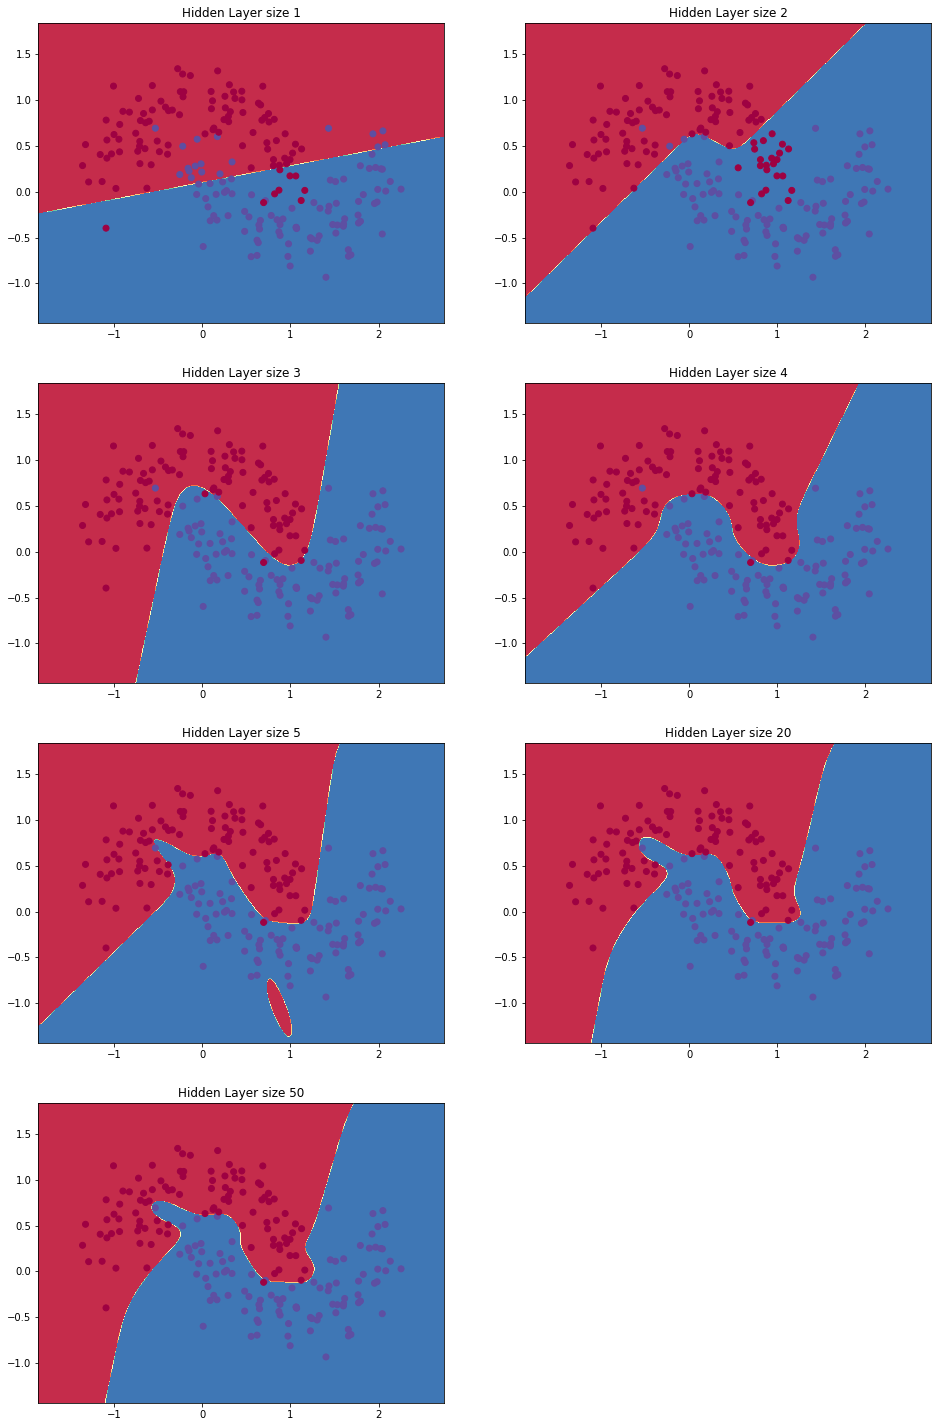

In [30]:
plt.figure(figsize=(16, 32))
hiddenLayers = [1, 2, 3, 4, 5, 20, 50]
for i, nn_hdim in enumerate(hiddenLayers):
    plt.subplot(5, 2, i+1)
    plt.title('%d Hidden Layer' % nn_hdim)
    param = model.build_model(nn_hdim, print_loss=False)
    plot_decision_boundary(X, y, lambda x: model.predict(x))
plt.show()